In [ ]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.8 MB 34.6 MB/s 
     |████████████████████████████████| 19.2 MB 144 kB/s 
     |████████████████████████████████| 240 kB 67.3 MB/s 
     |████████████████████████████████| 55 kB 1.8 MB/s 
     |████████████████████████████████| 106 kB 59.0 MB/s 
     |████████████████████████████████| 49 kB 4.5 MB/s 
     |████████████████████████████████| 929 kB 30.6 MB/s 
     |████████████████████████████████| 50 kB 2.3 MB/s 
     |████████████████████████████████| 37.5 MB 1.3 MB/s 
     |████████████████████████████████| 4.0 MB 10.5 MB/s 
     |████████████████████████████████| 1.9 MB 49.4 MB/s 
     |████████████████████████████████| 112 kB 74.6 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.3-py3-none-any.whl size=12262 sha256=e06b146a4fbda003857d3b9842d8dd8de30674f6116287c4fc880f02d0a027ab
  Stored in directory: /root/.cache/pip/wheels/46/24/40/7b6f

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
print("Imports Successful")

Imports Successful


In [ ]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U
    

In [ ]:
# Specify variables
n_count = 8  # number of counting qubits
a = 7

In [ ]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

In [ ]:
# Create QuantumCircuit with n_count counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(n_count + 4, n_count)

# Initialize counting qubits
# in state |+>
for q in range(n_count):
    qc.h(q)
    
# And auxiliary register in state |1>
qc.x(n_count)

# Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), 
             [q] + [i+n_count for i in range(4)])

# Do inverse-QFT
qc.append(qft_dagger(n_count), range(n_count))

# Measure circuit
qc.measure(range(n_count), range(n_count))
qc.draw(fold=-1)  # -1 means 'do not fold' 

┌───┐                                                                                                                             ┌───────┐┌─┐                     
 q_0: ┤ H ├───────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├─────────────────────
      ├───┤       │                                                                                                                     │       │└╥┘┌─┐                  
 q_1: ┤ H ├───────┼──────────────■──────────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├─╫─┤M├──────────────────
      ├───┤       │              │                                                                                                      │       │ ║ └╥┘┌─┐               
 q_2: ┤ H ├───────┼──────────────┼──────────────■───────────────────────────────────────────────────────────────────────────────────────┤2      ├─╫──╫─┤M├───────────────
      ├───┤       │              │              │                                                                                       │       │ ║  ║ └╥┘┌─┐            
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■────────────────────────────────────────────────────────────────────────┤3      ├─╫──╫──╫─┤M├────────────
      ├───┤       │              │              │              │                                                                        │  QFT† │ ║  ║  ║ └╥┘┌─┐         
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────■─────────────────────────────────────────────────────────┤4      ├─╫──╫──╫──╫─┤M├─────────
      ├───┤       │              │              │              │              │                                                         │       │ ║  ║  ║  ║ └╥┘┌─┐      
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────■─────────────────────────────────────────┤5      ├─╫──╫──╫──╫──╫─┤M├──────
      ├───┤       │              │              │              │              │               │                                         │       │ ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────■─────────────────────────┤6      ├─╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤       │              │              │              │              │               │               │                         │       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────┼────────────────■────────┤7      ├─╫──╫──╫──╫──╫──╫──╫─┤M├
      ├───┤┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐└───────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 q_8: ┤ X ├┤0            ├┤0            ├┤0            ├┤0            ├┤0             ├┤0             ├┤0             ├┤0              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
      └───┘│             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
 q_9: ─────┤1            ├┤1            ├┤1            ├┤1            ├┤1             ├┤1             ├┤1             ├┤1              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 ││  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_10: ─────┤2            ├┤2            ├┤2            ├┤2            ├┤2             ├┤2             ├┤2             ├┤2              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_11: ─────┤3            ├┤3            ├┤3            ├┤3            ├┤3             ├┤3       

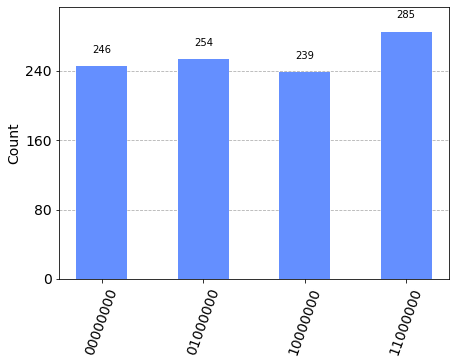

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [ ]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**n_count} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

            Register Output           Phase
0  11000000(bin) = 192(dec)  192/256 = 0.75
1  00000000(bin) =   0(dec)    0/256 = 0.00
2  10000000(bin) = 128(dec)  128/256 = 0.50
3  01000000(bin) =  64(dec)   64/256 = 0.25


In [ ]:
Fraction(0.666)

Fraction(5998794703657501, 9007199254740992)

In [ ]:
# Get fraction that most closely resembles 0.666
# with denominator < 15
Fraction(0.666).limit_denominator(15)

Fraction(2, 3)

In [ ]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.75      3/4            4
1   0.00      0/1            1
2   0.50      1/2            2
3   0.25      1/4            4


 Factoring from Period Finding 

```
`# This is formatted as code`
```



In [ ]:
N = 15

In [ ]:
np.random.seed(1) # This is to make sure we get reproduceable results
a = randint(2, 15)
print(a)

7


In [ ]:
from math import gcd # greatest common divisor
gcd(a, N)

1

In [ ]:
def qpe_amod15(a):
    n_count = 8
    qc = QuantumCircuit(4+n_count, n_count)
    for q in range(n_count):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(3+n_count) # And auxiliary register in state |1>
    for q in range(n_count): # Do controlled-U operations
        qc.append(c_amod15(a, 2**q), 
                 [q] + [i+n_count for i in range(4)])
    qc.append(qft_dagger(n_count), range(n_count)) # Do inverse-QFT
    qc.measure(range(n_count), range(n_count))
    # Simulate Results
    aer_sim = Aer.get_backend('aer_simulator')
    # Setting memory=True below allows us to see a list of each sequential reading
    t_qc = transpile(qc, aer_sim)
    qobj = assemble(t_qc, shots=1)
    result = aer_sim.run(qobj, memory=True).result()
    readings = result.get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**n_count)
    print("Corresponding Phase: %f" % phase)
    return phase

In [ ]:
phase = qpe_amod15(a) # Phase = s/r
Fraction(phase).limit_denominator(15) # Denominator should (hopefully!) tell us r

Register Reading: 11000000
Corresponding Phase: 0.750000


Fraction(3, 4)

In [ ]:
frac = Fraction(phase).limit_denominator(15)
s, r = frac.numerator, frac.denominator
print(r)

4


In [ ]:
guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(guesses)

[3, 5]


In [ ]:
a = 7
factor_found = False
attempt = 0
while not factor_found:
    attempt += 1
    print("\nAttempt %i:" % attempt)
    phase = qpe_amod15(a) # Phase = s/r
    frac = Fraction(phase).limit_denominator(N) # Denominator should (hopefully!) tell us r
    r = frac.denominator
    print("Result: r = %i" % r)
    if phase != 0:
        # Guesses for factors are gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print("Guessed Factors: %i and %i" % (guesses[0], guesses[1]))
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0: # Check to see if guess is a factor
                print("*** Non-trivial factor found: %i ***" % guess)
                factor_found = True


Attempt 1:
Register Reading: 01000000
Corresponding Phase: 0.250000
Result: r = 4
Guessed Factors: 3 and 5
*** Non-trivial factor found: 3 ***
*** Non-trivial factor found: 5 ***


USING CIRQ

In [ ]:
pip install cirq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 576 kB 26.2 MB/s 
     |████████████████████████████████| 66 kB 5.6 MB/s 
     |████████████████████████████████| 1.8 MB 71.8 MB/s 
     |████████████████████████████████| 594 kB 74.6 MB/s 
     |████████████████████████████████| 57 kB 2.5 MB/s 
     |████████████████████████████████| 115 kB 68.0 MB/s 
     |████████████████████████████████| 221 kB 66.3 MB/s 
     |████████████████████████████████| 229 kB 63.7 MB/s 
     |████████████████████████████████| 147 kB 64.1 MB/s 
     |████████████████████████████████| 44 kB 1.8 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 68 kB 7.9 MB/s 
     |████████████████████████████████| 80 kB 9.7 MB/s 
     |████████████████████████████████| 58 kB 6.5 MB/s 
     |████████████████████████████████| 119 kB 

CLASSICAL PART 

In [ ]:
import math
import random
import sys
from fractions import Fraction
from builtins import input

def shor(N, attempts = 1):
    
    # build compilation engine list
    rule_set = DecompositionRuleSet(modules=[projectq.libs.math,
                                             projectq.setups.decompositions])
    compilerengines = [AutoReplacer(rule_set),
                       InstructionFilter(high_level_gates),
                       TagRemover(),
                       LocalOptimizer(3),
                       AutoReplacer(rule_set),
                       TagRemover(),
                       LocalOptimizer(3)]

    # make the compiler and run the circuit on the simulator backend
    eng = MainEngine(Simulator(), compilerengines)
    
    for attempt in range(attempts):
        print("-----------------------------------")
        print("\nAttempt #" + str(attempt))
        
        x = random.randint(0, N)
        print("Random x between 0 and N-1 --> ", str(x))
        
        '''If the GCD is not 1, x is a nontrivial factor of N, so we're done'''
        if (math.gcd(x, N) != 1):
            print("\nFactors found classically, re-attempt...")
            continue
        
        '''Otherwise it means that x and N are coprime
        Here the quantum part starts: Shor's algorithm tries to find r, the period of x^a mod n, where n is 
        the number to be factored and x is an integer coprime to n.
        It is important to underline the r  is the smallest positive integer such that x^r = 1 mod N
        '''
        r = find_period(eng, N, x, verbose=False)
        
        '''If r is odd or if x^r/2 = -1 (mod N), choose another x
        EXPLANATION: we already know that x^r/2 is NOT congruent to 1 (mod N), otherwise the order of x would be r/2,
        instead of r. So we have to check only that x^r/2 is NOT congruent to -1 (mod N)
        '''
        if ((r % 2 != 0) or (pow(x, int(r/2), N) == -1)): 
            print("r is odd or x^r/2 = -1 (mod N), re-attempt...")
            continue
            
        print("\nPeriod found: " + str(r))
        
        p = math.gcd(x**int(r / 2) + 1, N)
        q = math.gcd(x**int(r / 2) - 1, N)
        
        if ((not p * q == N) and p * q > 1 and int(1. * N / (p * q)) * p * q == N):
            p, q = p * q, int(N / (p * q))
        if p * q == N and p > 1 and q > 1:
            print("\nFactors found: {} * {} = {}.".format(p, q, N))
            break
        else:
            print("\nBad luck: Found {} and {}".format(p, q))

In [ ]:
pip install projectq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 433 kB 33.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 419 kB 61.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for projectq: filename=projectq-0.7.3-cp38-cp38-linux_x86_64.whl size=1818728 sha256=c4773e71d5d6fd84116e46292792b811af7b49b93f285ad7958bbbaada92a1fc
  Stored in directory: /root/.cache/pip/wheels/11/e6/3b/3b07762c059ac79e89afebf4c6470a685376759d9b542546cc
Successfully built projectq


In [ ]:
import projectq.libs.math
import projectq.setups.decompositions
from projectq.backends import Simulator, ResourceCounter
from projectq.cengines import (AutoReplacer, DecompositionRuleSet,
                               InstructionFilter, LocalOptimizer,
                               MainEngine, TagRemover)
from projectq.libs.math import (AddConstant, AddConstantModN,
                                MultiplyByConstantModN)
from projectq.meta import Control
from projectq.ops import (All, BasicMathGate, get_inverse, H, Measure, QFT, R,
                          Swap, X)

In [ ]:
'''As said in ProjectQ webpage --> "Simulating Shor s algorithm at the level of single-qubits gates and CNOTs already takes
quite a big of time for larger numbers than 15."
Returning TRUE allows to use the emulation feature, which does not decompose the modular arithmetic to low-level gates.'''
def high_level_gates(eng, cmd):
    return True
def find_period(eng, N, a, verbose=False):
    
    n = int(math.ceil(math.log(N, 2))) # log2(N)

    x = eng.allocate_qureg(n)

    '''Pauli-X gate: acts on a single qubit. It is the quantum equivalent of the NOT gate for classical computers'''
    X | x[0]

    measurements = [0] * (2 * n)  # will hold the 2n measurement results

    ctrl_qubit = eng.allocate_qubit()

    for k in range(2 * n):
        '''Compute a^x mod N conditioned on a control qubit ctrl_qubit in a uniform superposition of 0 and 1'''
        current_a = pow(a, 1 << (2 * n - 1 - k), N) # << is binary left shift, so we are computing a^(2^(2n-1-k)) mod N
        # one iteration of 1-qubit QPE (Quantum Phase Estimation)
        H | ctrl_qubit
        with Control(eng, ctrl_qubit):
            MultiplyByConstantModN(current_a, N) | x

        # perform semi-classical inverse QFT --> Rotations conditioned on previous outcomes
        for i in range(k):
            if measurements[i]:
                R(-math.pi/(1 << (k - i))) | ctrl_qubit
        
        # final Hadamard of the inverse QFT
        H | ctrl_qubit

        # and measure
        Measure | ctrl_qubit
        eng.flush() # flush all gates and execute measurements
        measurements[k] = int(ctrl_qubit)
        if measurements[k]:
            X | ctrl_qubit # reset

        if verbose:
            print("\033[95m{}\033[0m".format(measurements[k]), end="")
            sys.stdout.flush()

    All(Measure) | x # shortcut (instance of) projectq.ops.Tensor
    # turn the measured values into a number in [0,1)
    y = sum([(measurements[2 * n - 1 - i]*1. / (1 << (i + 1)))
             for i in range(2 * n)])

    # continued fraction expansion to get denominator (the period)
    r = Fraction(y).limit_denominator(N-1).denominator

    # return the (potential) period
    return r

In [ ]:
shor(15, 7)


-----------------------------------

Attempt #0
Random x between 0 and N-1 -->  10

Factors found classically, re-attempt...
-----------------------------------

Attempt #1
Random x between 0 and N-1 -->  7

Period found: 4

Factors found: 5 * 3 = 15.
